<a href="https://www.kaggle.com/code/sharonlogier/sleep-cycle-productivity?scriptVersionId=224452988" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

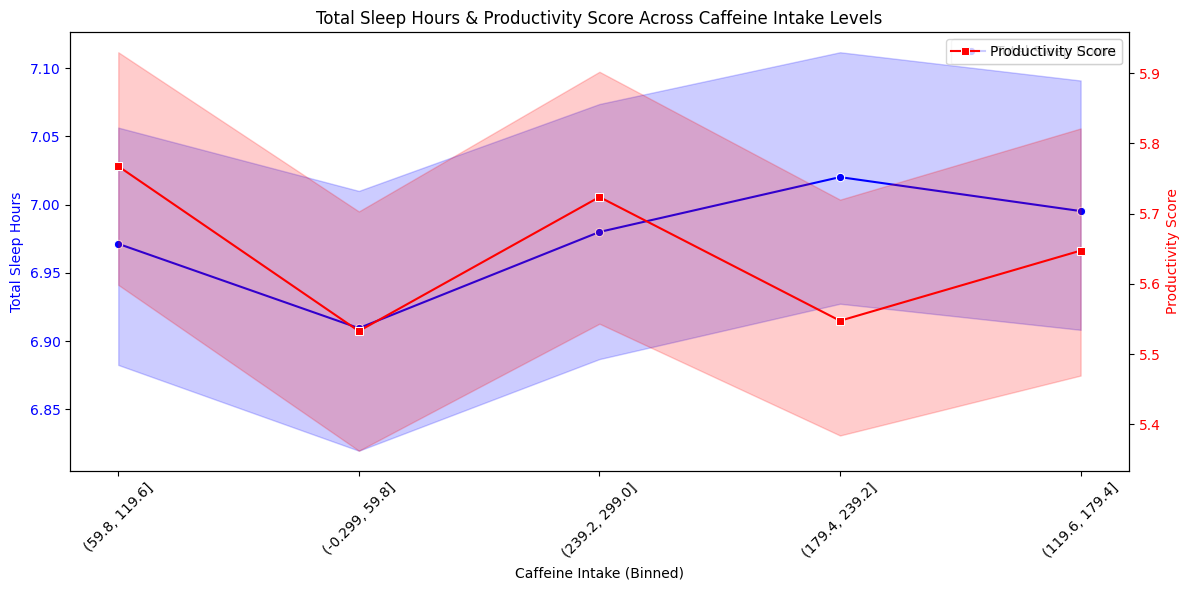

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (Replace 'your_file.csv' with the correct filename)
df = pd.read_csv("/kaggle/input/cleaned-sleep-cycle-productivity-data-set/Cleaned_Sleep_Cycle_Productivity_Dataset.csv") 

# Suppress FutureWarnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Ensure there are no infinite values
df.replace([float("inf"), float("-inf")], pd.NA, inplace=True)

# Create caffeine intake bins and convert them to string labels
df["Caffeine_Bins"] = pd.cut(df["Caffeine_Intake_mg"], bins=5)
df = df.dropna(subset=["Caffeine_Bins"])  # Drop rows with NaN bins
df["Caffeine_Bins"] = df["Caffeine_Bins"].astype(str)  # Convert bins to string

# Creating a dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Sleep Hours on the first y-axis
sns.lineplot(x="Caffeine_Bins", y="Total_Sleep_Hours", marker="o", color="blue", ax=ax1, label="Total Sleep Hours", data=df)
ax1.set_xlabel("Caffeine Intake (Binned)")
ax1.set_ylabel("Total Sleep Hours", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Fix x-axis ticks for correct formatting
ax1.set_xticks(range(len(df["Caffeine_Bins"].unique())))
ax1.set_xticklabels(df["Caffeine_Bins"].unique(), rotation=45)

# Create a second y-axis
ax2 = ax1.twinx()
sns.lineplot(x="Caffeine_Bins", y="Productivity_Score", marker="s", color="red", ax=ax2, label="Productivity Score", data=df)
ax2.set_ylabel("Productivity Score", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Title and layout adjustments
plt.title("Total Sleep Hours & Productivity Score Across Caffeine Intake Levels")
fig.tight_layout()
plt.show()

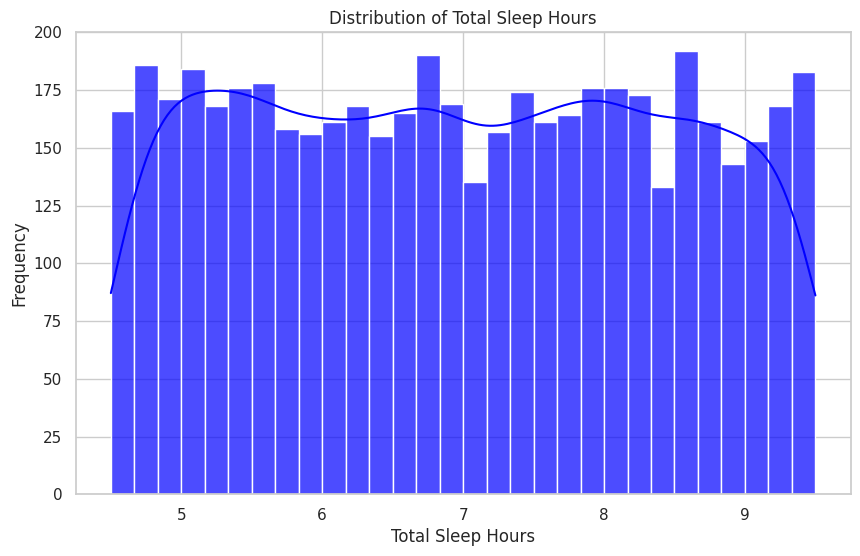

In [2]:
# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# Creating the histogram with KDE line
plt.figure(figsize=(10, 6))
sns.histplot(df["Total_Sleep_Hours"], bins=30, kde=True, color="blue", alpha=0.7)
plt.title("Distribution of Total Sleep Hours")
plt.xlabel("Total Sleep Hours")
plt.ylabel("Frequency")
plt.ylim(0, 200)  # Adjust y-axis limit to match the reference image
plt.show()

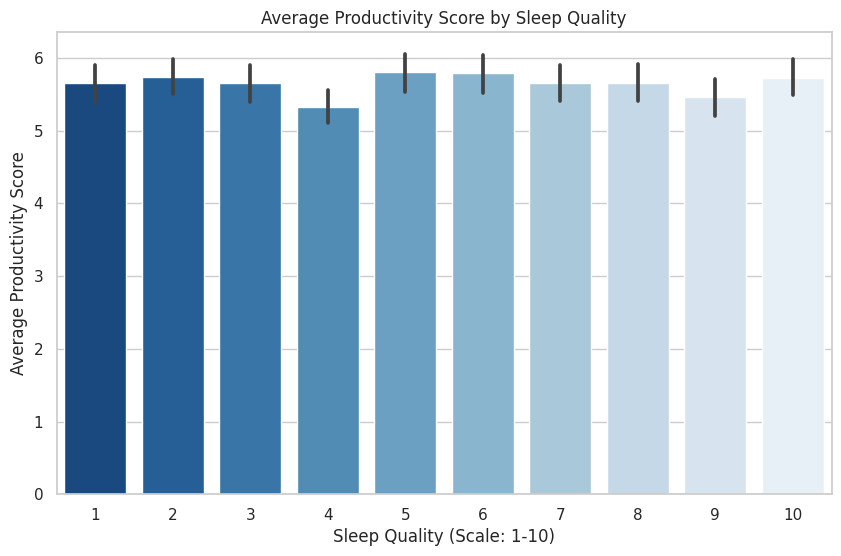

In [3]:
# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# Creating the bar plot for Productivity Score by Sleep Quality
plt.figure(figsize=(10, 6))
sns.barplot(x="Sleep_Quality", y="Productivity_Score", data=df, estimator=lambda x: x.mean(), palette="Blues_r")
plt.title("Average Productivity Score by Sleep Quality")
plt.xlabel("Sleep Quality (Scale: 1-10)")
plt.ylabel("Average Productivity Score")
plt.show()

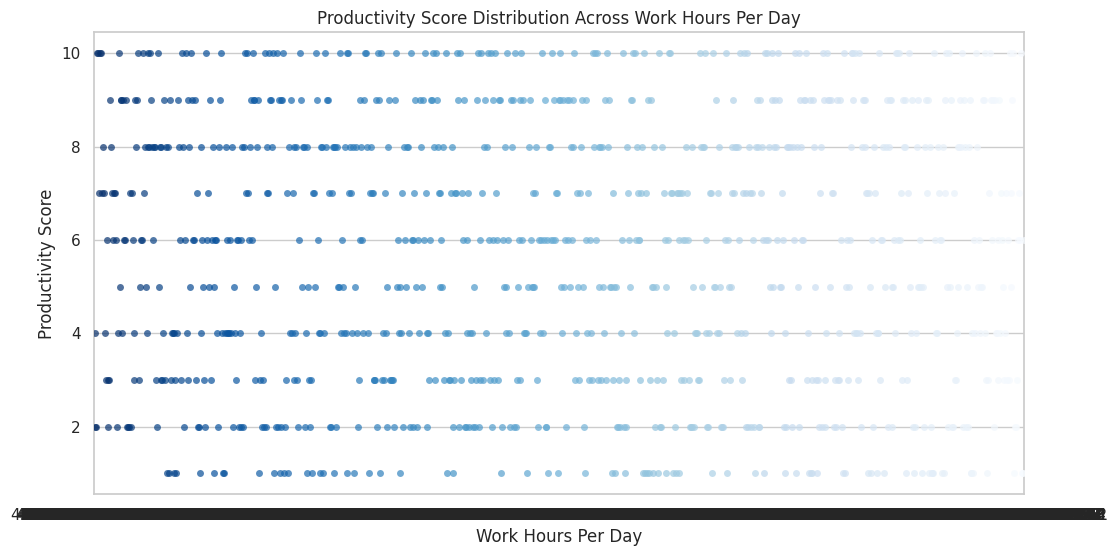

In [4]:
# Sample data for faster rendering
df_sample = df.sample(n=1000, random_state=42)  # Reduce to 1000 points

# 1️⃣ Strip Plot: Work Hours vs. Productivity Score
plt.figure(figsize=(12, 6))
sns.stripplot(x="Work_Hours_Per_Day", y="Productivity_Score", data=df_sample, jitter=True, palette="Blues_r", alpha=0.7)
plt.title("Productivity Score Distribution Across Work Hours Per Day")
plt.xlabel("Work Hours Per Day")
plt.ylabel("Productivity Score")
plt.show()

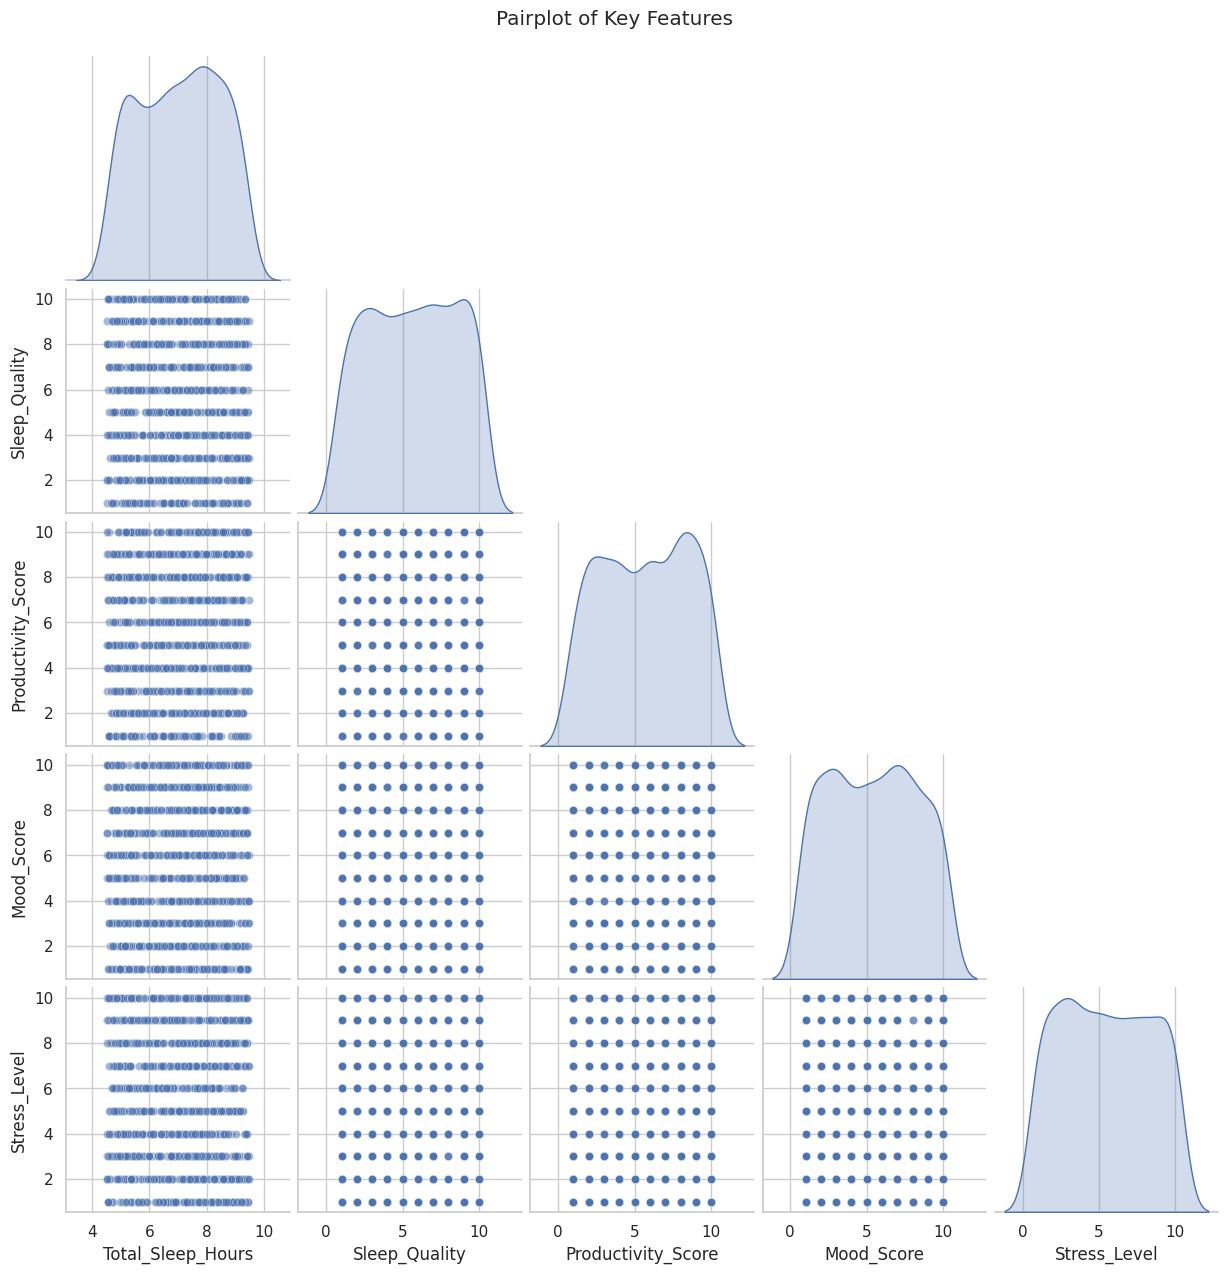

In [5]:
# 3️⃣ Pairplot: Relationships Between Key Features
selected_features = ["Total_Sleep_Hours", "Sleep_Quality", "Productivity_Score", "Mood_Score", "Stress_Level"]
sns.pairplot(df_sample[selected_features], diag_kind="kde", corner=True, plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()